<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/GANs_Fashion_MNIST_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
(X_train,_),(_,_) = tf.keras.datasets.fashion_mnist.load_data()
X_train.astype('float')
X_train = (X_train-127.5)/127.5
dataset = np.expand_dims(X_train,-1)
dataset.shape

(60000, 28, 28, 1)

In [ ]:
def display_from_dataset(dataset,n=6):
  data = np.squeeze(dataset, axis=-1)
  for i in range(n*n):
    plt.subplot(n,n,1+i)
    plt.imshow(data[i],cmap='gray')
  plt.show()

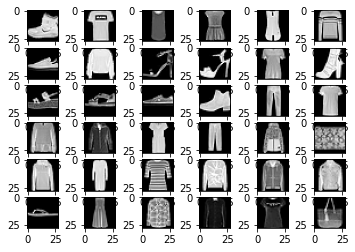

In [ ]:
display_from_dataset(dataset)

In [ ]:
def sample_real(dataset,batch_size):
  idx = random.sample(range(0, dataset.shape[0]), batch_size)
  X = np.take(dataset, idx,axis=0)
  Y = np.ones((batch_size,1))
  return X,Y

In [ ]:
def sample_fake(g_model,batch_size,latent_dims):
  latent = generate_latent(batch_size,latent_dims)
  X = g_model.predict(latent)
  Y = np.zeros((batch_size,1))
  return X,Y

In [ ]:
def generate_latent(batch_size,latent_dims):
  latent = np.random.randn(batch_size*latent_dims)
  latent = np.reshape(latent,(batch_size,latent_dims))
  return latent

In [ ]:
def define_discriminator(input_dims = (28,28,1)):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(128,(3,3),strides=(2,2),padding='same',input_shape=input_dims))
  model.add(tf.keras.layers.LeakyReLU(alpha = 0.2))
  model.add(tf.keras.layers.Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(tf.keras.layers.LeakyReLU(alpha = 0.2))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

  opt = tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(optimizer=opt, loss="binary_crossentropy",metrics=['accuracy'])
  return model

In [ ]:
def define_generator(latent_dims):
  model = tf.keras.Sequential()
  n_nodes = 128*7*7
  model.add(tf.keras.layers.Dense(n_nodes,input_dim = latent_dims))
  model.add(tf.keras.layers.Reshape((7,7,128)))
  model.add(tf.keras.layers.Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(tf.keras.layers.LeakyReLU(alpha = 0.2))
  model.add(tf.keras.layers.Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(tf.keras.layers.LeakyReLU(alpha = 0.2))
  model.add(tf.keras.layers.Conv2D(1,(7,7),padding='same',activation='tanh'))
  return model

In [ ]:
def define_gan(d_model,g_model):
  d_model.trainable = False
  model = tf.keras.Sequential()
  model.add(g_model)
  model.add(d_model)

  opt = tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(optimizer=opt, loss="binary_crossentropy")
  return model

In [ ]:
def train_gan(dataset,gan_model,d_model,g_model,latent_dims=100,epochs=20,batch_size=128):
  per_epoch = dataset.shape[0]//batch_size
  for i in range(epochs):
    for j in range(per_epoch):
      X_real,Y_real = sample_real(dataset,batch_size//2)
      d_loss1,_ = d_model.train_on_batch(X_real,Y_real)
      X_fake,Y_fake = sample_fake(g_model,batch_size//2,latent_dims)
      d_loss2,_ = d_model.train_on_batch(X_fake,Y_fake)

      latent = generate_latent(batch_size,latent_dims)
      y = np.ones((batch_size,1))
      gan_loss1 = gan_model.train_on_batch(latent,y)
      print(f"Epoch {i} : {j}/{per_epoch} ===> D_real : {d_loss1} D_fake : {d_loss2} Gan_loss : {gan_loss1}")

In [ ]:
latent_dims = 100
d_model = define_discriminator()
g_model = define_generator(latent_dims)
gan_model = define_gan(d_model,g_model)
train_gan(dataset,gan_model,d_model,g_model,latent_dims)

Streaming output truncated to the last 5000 lines.
Epoch 9 : 148/468 ===> D_real : 0.6741564273834229 D_fake : 0.7043022513389587 Gan_loss : 0.6980511546134949
Epoch 9 : 149/468 ===> D_real : 0.6565836668014526 D_fake : 0.7054709196090698 Gan_loss : 0.7078306078910828
Epoch 9 : 150/468 ===> D_real : 0.6832360625267029 D_fake : 0.7015843987464905 Gan_loss : 0.7021202445030212
Epoch 9 : 151/468 ===> D_real : 0.6917500495910645 D_fake : 0.7039615511894226 Gan_loss : 0.7036623358726501
Epoch 9 : 152/468 ===> D_real : 0.6781502962112427 D_fake : 0.698637843132019 Gan_loss : 0.7127026319503784
Epoch 9 : 153/468 ===> D_real : 0.6814823746681213 D_fake : 0.6902156472206116 Gan_loss : 0.7235992550849915
Epoch 9 : 154/468 ===> D_real : 0.6938858032226562 D_fake : 0.6780332326889038 Gan_loss : 0.7205526828765869
Epoch 9 : 155/468 ===> D_real : 0.677222728729248 D_fake : 0.6864954233169556 Gan_loss : 0.7182395458221436
Epoch 9 : 156/468 ===> D_real : 0.686917781829834 D_fake : 0.6900690793991089 G

In [ ]:
train_gan(dataset,gan_model,d_model,g_model,latent_dims)

Streaming output truncated to the last 5000 lines.
Epoch 9 : 148/468 ===> D_real : 0.6838670969009399 D_fake : 0.6839689016342163 Gan_loss : 0.7212687134742737
Epoch 9 : 149/468 ===> D_real : 0.7119370698928833 D_fake : 0.6809762716293335 Gan_loss : 0.7093470096588135
Epoch 9 : 150/468 ===> D_real : 0.6878780722618103 D_fake : 0.6790849566459656 Gan_loss : 0.7139328122138977
Epoch 9 : 151/468 ===> D_real : 0.6937731504440308 D_fake : 0.6966566443443298 Gan_loss : 0.7100937366485596
Epoch 9 : 152/468 ===> D_real : 0.6925580501556396 D_fake : 0.6830363273620605 Gan_loss : 0.7125985622406006
Epoch 9 : 153/468 ===> D_real : 0.697711706161499 D_fake : 0.6783294081687927 Gan_loss : 0.717818021774292
Epoch 9 : 154/468 ===> D_real : 0.6874053478240967 D_fake : 0.6848389506340027 Gan_loss : 0.7152292728424072
Epoch 9 : 155/468 ===> D_real : 0.6941553354263306 D_fake : 0.6841025948524475 Gan_loss : 0.7118471264839172
Epoch 9 : 156/468 ===> D_real : 0.6879152655601501 D_fake : 0.6957395076751709 

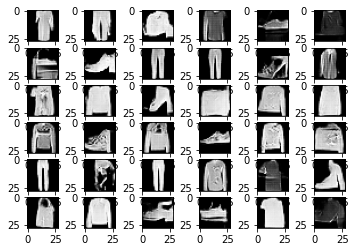

array([[0.49984425],
       [0.5082669 ],
       [0.5050797 ],
       [0.45393077],
       [0.46513173],
       [0.4620674 ],
       [0.51805884],
       [0.4908098 ],
       [0.5007427 ],
       [0.5064137 ],
       [0.5157375 ],
       [0.48768494],
       [0.5036851 ],
       [0.51057434],
       [0.47190818],
       [0.48516333],
       [0.49020022],
       [0.5196893 ],
       [0.49969703],
       [0.51172954],
       [0.47517347],
       [0.47449765],
       [0.5205627 ],
       [0.492442  ],
       [0.507829  ],
       [0.46031028],
       [0.535294  ],
       [0.5179596 ],
       [0.46368107],
       [0.50953835],
       [0.49373797],
       [0.5003628 ],
       [0.4886646 ],
       [0.47548386],
       [0.5045189 ],
       [0.466276  ]], dtype=float32)

In [ ]:
X,_ = sample_fake(g_model,36,latent_dims=100)
display_from_dataset(X,n=6)
d_model.predict(X)

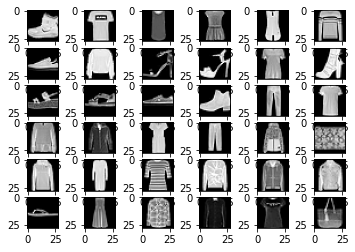

array([[0.51006067],
       [0.5354538 ],
       [0.47822708],
       [0.47779748],
       [0.5441767 ],
       [0.5140001 ],
       [0.5131283 ],
       [0.5070031 ],
       [0.50180894],
       [0.56773293],
       [0.487013  ],
       [0.5153078 ],
       [0.48600265],
       [0.4727372 ],
       [0.48655212],
       [0.5254134 ],
       [0.48461074],
       [0.5124341 ],
       [0.49600598],
       [0.46668288],
       [0.52081746],
       [0.50429106],
       [0.46698892],
       [0.4546072 ],
       [0.5327909 ],
       [0.48728204],
       [0.49938437],
       [0.5136116 ],
       [0.48954043],
       [0.49219394],
       [0.5286227 ],
       [0.49004465],
       [0.49275512],
       [0.47155464],
       [0.4729027 ],
       [0.4854316 ]], dtype=float32)

In [ ]:
display_from_dataset(dataset,n=6)
d_model.predict(dataset[:36])